In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2023-08-24 22:49:51.082457: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 22:49:51.083501: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 22:49:51.106289: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 22:49:51.107244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 22:49:51.582249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
class UniversalSentenceEncoder:
    def __init__(self):
        self.model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

    def compute_embeddings(self, sentences):
        embeddings = self.model(sentences)
        return embeddings

    @staticmethod
    def compute_similarity(embedding1, embedding2):
        similarity = tf.reduce_sum(embedding1 * embedding2, axis=-1) / (
            tf.norm(embedding1, axis=-1) * tf.norm(embedding2, axis=-1)
        )
        return similarity

In [3]:
use = UniversalSentenceEncoder()

sentences = [
    "My name is Arun Ghimire",
    "I am a Machine Learning Engineer.",
    "I am Arun Ghimire.",
    "I work as an AI Engineer."
]

2023-08-24 23:16:32.010704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-24 23:16:32.010995: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
embeddings = use.compute_embeddings(sentences)

In [5]:
embeddings.shape

TensorShape([4, 512])

In [6]:
def visualize_embeddings(embeddings, sentences, dimensions=2):
    pca = PCA(n_components=dimensions)
    reduced_embeddings = pca.fit_transform(embeddings)

    if dimensions == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
        for i, sentence in enumerate(sentences):
            plt.annotate(sentence, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.title("Universal Sentence Encoding 2D Visualization")
        
    elif dimensions == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(
            reduced_embeddings[:, 0],
            reduced_embeddings[:, 1],
            reduced_embeddings[:, 2]
        )
        for i, sentence in enumerate(sentences):
            ax.text(
                reduced_embeddings[i, 0],
                reduced_embeddings[i, 1],
                reduced_embeddings[i, 2],
                sentence
            )
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.set_zlabel("Principal Component 3")
        ax.set_title("Universal Sentence Encoding 3D Visualization")
        
    plt.tight_layout()
    plt.show()

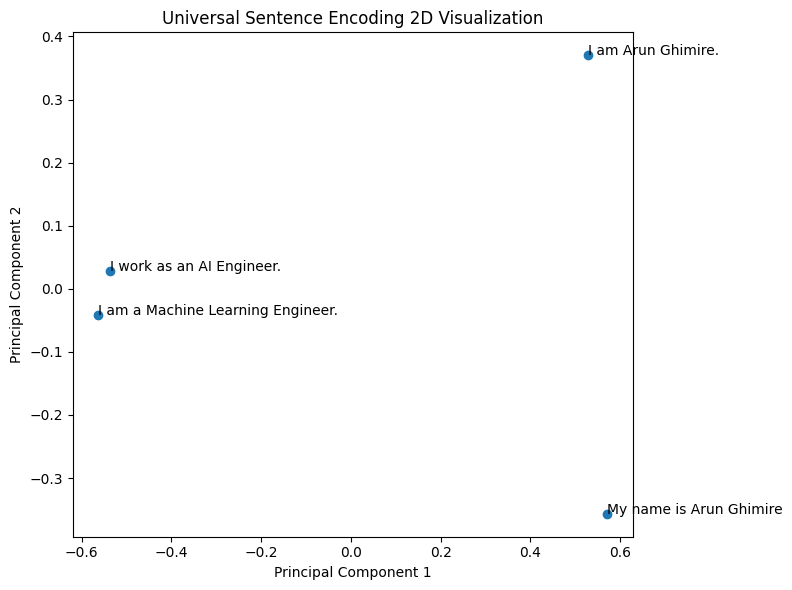

In [7]:
visualize_embeddings(embeddings, sentences, 2)

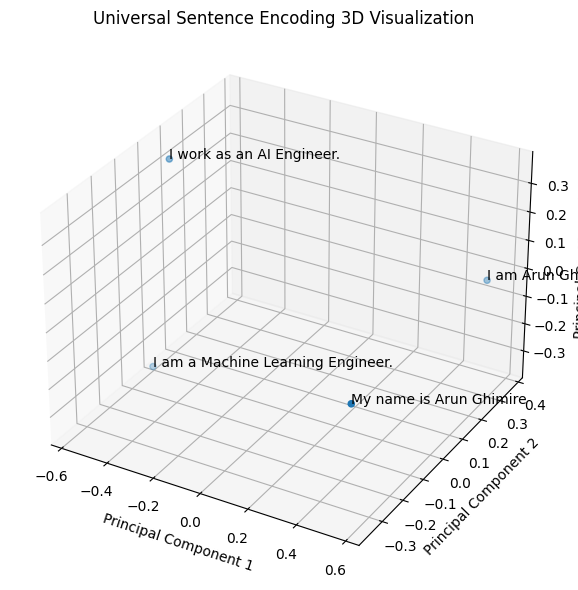

In [8]:
visualize_embeddings(embeddings, sentences, 3)

In [9]:
# Compute similarity between embeddings
similarity_matrix = []
for i in range(len(embeddings)):
    similarities = []
    for j in range(len(embeddings)):
        similarity = use.compute_similarity(
            embeddings[i], embeddings[j]
        )
        similarities.append(similarity.numpy())
    similarity_matrix.append(similarities)

In [10]:
for i, sentence in enumerate(sentences):
    print("Similarity with '{}'".format(sentence))
    for j, sim in enumerate(similarity_matrix[i]):
        print("  Similarity with '{}' : {:.4f}".format(sentences[j], sim))

Similarity with 'My name is Arun Ghimire'
  Similarity with 'My name is Arun Ghimire' : 1.0000
  Similarity with 'I am a Machine Learning Engineer.' : 0.2367
  Similarity with 'I am Arun Ghimire.' : 0.7327
  Similarity with 'I work as an AI Engineer.' : 0.2593
Similarity with 'I am a Machine Learning Engineer.'
  Similarity with 'My name is Arun Ghimire' : 0.2367
  Similarity with 'I am a Machine Learning Engineer.' : 1.0000
  Similarity with 'I am Arun Ghimire.' : 0.2729
  Similarity with 'I work as an AI Engineer.' : 0.7481
Similarity with 'I am Arun Ghimire.'
  Similarity with 'My name is Arun Ghimire' : 0.7327
  Similarity with 'I am a Machine Learning Engineer.' : 0.2729
  Similarity with 'I am Arun Ghimire.' : 1.0000
  Similarity with 'I work as an AI Engineer.' : 0.2975
Similarity with 'I work as an AI Engineer.'
  Similarity with 'My name is Arun Ghimire' : 0.2593
  Similarity with 'I am a Machine Learning Engineer.' : 0.7481
  Similarity with 'I am Arun Ghimire.' : 0.2975
  Si

In [12]:
def visualize_similarity(sentences, similarity_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap="viridis", interpolation="nearest")
    plt.colorbar(label="Cosine Similarity")
    plt.xticks(range(len(sentences)), sentences, rotation=45, ha="right")
    plt.yticks(range(len(sentences)), sentences)
    plt.title("Sentence Similarity")
    plt.tight_layout()
    plt.show()

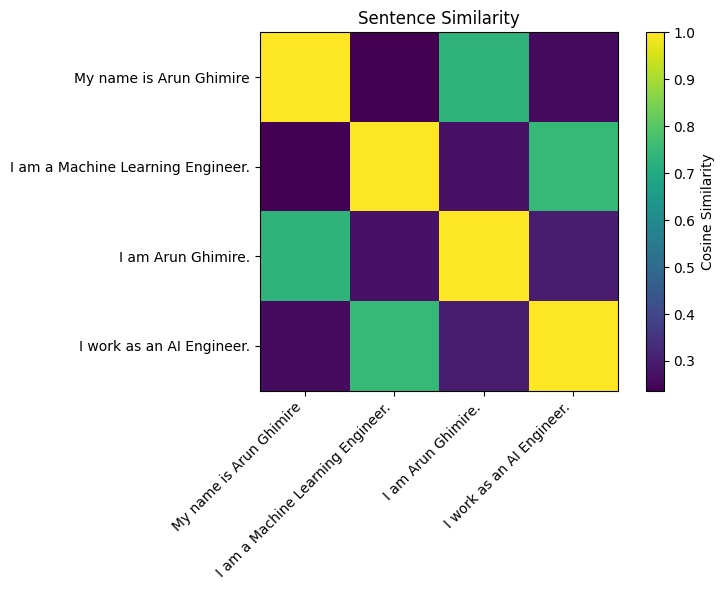

In [13]:
visualize_similarity(sentences, similarity_matrix)